In [1]:
with open ('DatasetEEGProject.txt') as file:
    lines = file.readline()
print(lines)

-0.104157199164273,-0.259246543121315,-0.200136486446206,-0.223659846162968,-0.355342496267319,-0.414616872010941,-0.152664393853455,-0.109741884344826,-0.177730991138879,-0.0233461420281158,0.000899771475154409,-0.139159956729128,-0.214079774707979,-0.0898423833610291,-0.116373180651494,-0.0941541214189644,-0.0316956609041659,-0.0154244168243983,-0.0842135940644226,-0.17321950199402,-0.179499093907204,-0.0483459715668431,-0.0720181088071678,-0.128797735258623,-0.0532988143951084,-0.0607631071702386,-0.209124490801824,-0.195746837285358,-0.215273795942448,-0.00968947433875877,-0.143305882779263,-0.304499470179002,-0.234380615672297,-0.269981333966567,-0.298936995370762,-0.292399837282645,-0.285184662432554,-0.157040041189552,-0.0302568397093679,-0.0580462455353132,-0.0133222274490216,-0.0982058181172443,-0.0348357052941637,-0.0802052530817831,-0.0703469075825209,-0.0719809070938748,-0.0524038289629759,-0.0931191657628213,-0.0970976574823658,-0.125014201459042,-0.118449935112187,-0.0785

In [2]:
from numpy import loadtxt
dataset = loadtxt('DatasetEEGProject.txt', dtype=float, delimiter=",", unpack=False)
print(dataset.shape)


from sklearn.model_selection import train_test_split
X_training_data,X_test_data,Y_training_data,Y_test_data = train_test_split(dataset[:,:64],dataset[:,64],test_size= 0.3,random_state=0)
print(X_test_data.shape)

(100, 65)
(30, 64)


(64, 64)
Eigenvalue shape:  (64,)
Eigenvector shape:  (64, 64)
(64,)
(64, 64)


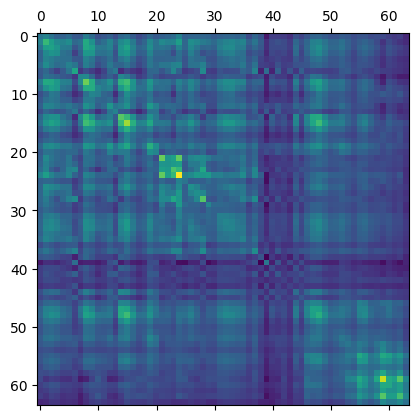

In [3]:
# PCA for Murpy
from PCA_Function import principalCA

eigval, eigvec = principalCA(X_training_data)
print(eigval.shape)
print(eigvec.shape)

----------4---------
(1, 4)
[[-0.51146192 -0.09299846 -0.91596198 -1.3730148 ]]


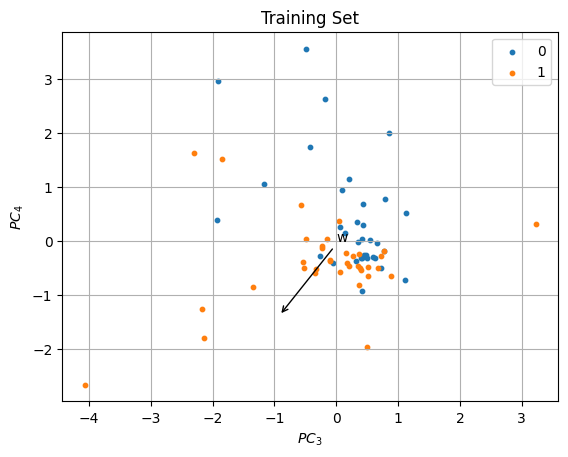

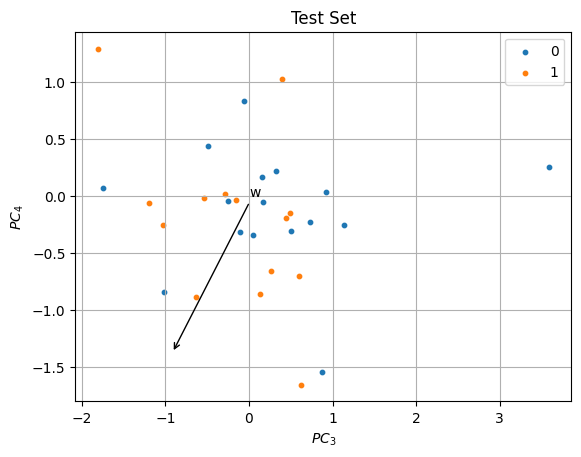

<Figure size 640x480 with 0 Axes>

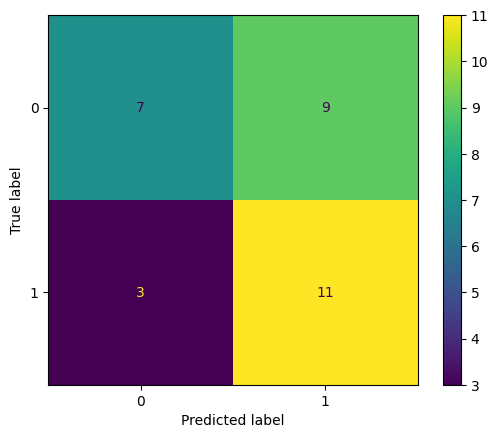

 f1: 0.6470588235294117
 auc: nan
In sample error: 0.2
Out of sample error: 0.4


c:\Users\Lorenzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


IndexError: list index out of range

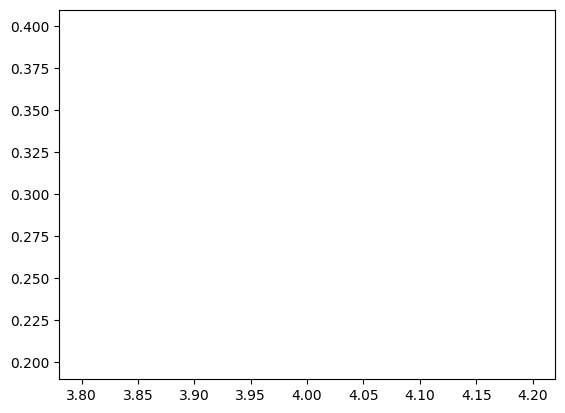

In [4]:
from Classifier_Lorenzo import runLogisticRegression
import numpy as np
import matplotlib.pyplot as plt

#nFeatureList = [2, 5, 10, 15, 30, 64]
#nFeatureList = np.arange(2,64,step = 2)
nFeatureList = [4]
Eins = np.zeros_like(nFeatureList) * 1.0
Eouts = np.zeros_like(nFeatureList) * 1.0
for id, nFeatures in enumerate(nFeatureList):
    print(f'----------{nFeatures}---------')
    [Ein, Eout] = runLogisticRegression(X_training_data, Y_training_data, X_test_data, Y_test_data, eigvec, nFeatures)
    Eins[id] = Ein
    Eouts[id] = Eout

plt.figure()
plt.plot(nFeatureList, Eins, label = 'Training error')
plt.plot(nFeatureList, Eouts, label = 'Test error')
plt.vlines(nFeatureList[1], 0, 1, label = 'Selected N', colors='grey', linestyles='dotted')
plt.xlabel('number of principal components')
plt.ylabel('error ()')
plt.legend()
plt.show()
